<a href="https://colab.research.google.com/github/changsin/AI/blob/main/8.3.knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create input data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
      [6., 1.],
      [7., 3.],
      [8., 2.],    
      [9., 0.],
      [8., 4.],
      [8., 6.],
      [9., 2.],    
      [9., 5.]
    ])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Plot the data
Also do some initial plot fitting

## polyfit plotting

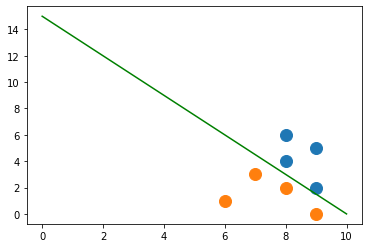

In [ ]:
x1 = np.linspace(0, 10, 100)
y1 = -1.5*x1 + 15

# fig1, ax1 = plt.subplots()
ax1 = plot_data(X, y)
ax1.plot(x1, y1, 'g', label='y=wx+b')


# Exercise 8.7

Let the table with training data from Exercise 8.4 be given. In the following, use the Manhattan distance d(a, b), defined as d(a, b) = |a1 − b1| + |a2 − b2|, to determine the distance d between two data points a = (a1, a2) and b = (b1, b2).

- (a) Classify the vector v = (8, 3.5) with the nearest neighbor method.

- (b) Classify the vector v = (8, 3.5) with the k nearest neighbor method for
k = 2,3,5.

## First, define the vector v = (8, 3.5)

In [ ]:
v = np.array([8., 3.5])

In [ ]:
X

array([[6., 1.],
       [7., 3.],
       [8., 2.],
       [9., 0.],
       [8., 4.],
       [8., 6.],
       [9., 2.],
       [9., 5.]])

### Get distance for all points
Use Manhattan distance

In [ ]:
def get_distance(X, v1):
  return [ abs(x[0] - v[0]) + abs(x[1] - v[1]) for x in X]

In [ ]:
ds = get_distance(X, v)
ds

[4.5, 1.5, 1.5, 4.5, 0.5, 2.5, 2.5, 2.5]

### Get the nearest point

In [ ]:
y[np.argmin(ds)]

1

### Plot the data
The red dot is the vector.

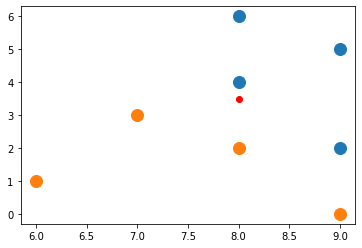

In [ ]:
ax = plot_data(X, y)
ax.scatter(v[0], v[1], color='red')

### KNN
To get k smallest, let's do some data manipulation to make it easy.

In [ ]:
Xy = np.reshape(y, (y.shape[0], -1))
Xy = np.append(X, y_reshape, axis=1)
Xy

array([[6., 1., 0.],
       [7., 3., 0.],
       [8., 2., 0.],
       [9., 0., 0.],
       [8., 4., 1.],
       [8., 6., 1.],
       [9., 2., 1.],
       [9., 5., 1.]])

In [ ]:
Xy[:, :2]

array([[6., 1.],
       [7., 3.],
       [8., 2.],
       [9., 0.],
       [8., 4.],
       [8., 6.],
       [9., 2.],
       [9., 5.]])

In [ ]:
ds = get_distance(Xy[:, :2], y)
ds

[4.5, 1.5, 1.5, 4.5, 0.5, 2.5, 2.5, 2.5]

In [ ]:
Xy

array([[6., 1., 0.],
       [7., 3., 0.],
       [8., 2., 0.],
       [9., 0., 0.],
       [8., 4., 1.],
       [8., 6., 1.],
       [9., 2., 1.],
       [9., 5., 1.]])

In [ ]:
k = 2
k_sorted = np.argpartition(ds, k)
k_sorted

array([4, 1, 2, 3, 0, 5, 6, 7])

In [ ]:
Xy_k = Xy[k_sorted][:k, :]

In [ ]:
Xy_k

array([[8., 4., 1.],
       [7., 3., 0.]])

In [ ]:
def find_knn(X, y, v, k):
  # append y to X to make it a single matrix
  Xy = np.reshape(y, (y.shape[0], -1))
  Xy = np.append(X, y_reshape, axis=1)

  # calculate the distances
  ds = get_distance(Xy[:, :2], y)

  # find the k smallest
  k_sorted = np.argpartition(ds, k)
  Xy_k = Xy[k_sorted][:k, :]

  c_positives = Xy_k[:, 2] == 1
  print("# of positives", c_positives)

  return 1 if sum(c_positives) >= k/2 else 0

# of positives [False False  True  True  True]


1

In [ ]:
print("k=2 v is classified as ", find_knn(X, y, v, 2))
print("k=3 v is classified as ", find_knn(X, y, v, 3))
print("k=5 v is classified as ", find_knn(X, y, v, 5))



# of positives [ True False]
k=2 v is classified as  1
# of positives [False False  True]
k=3 v is classified as  0
# of positives [False False  True  True  True]
k=5 v is classified as  1
